In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, index_col='Month', parse_dates=True)
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


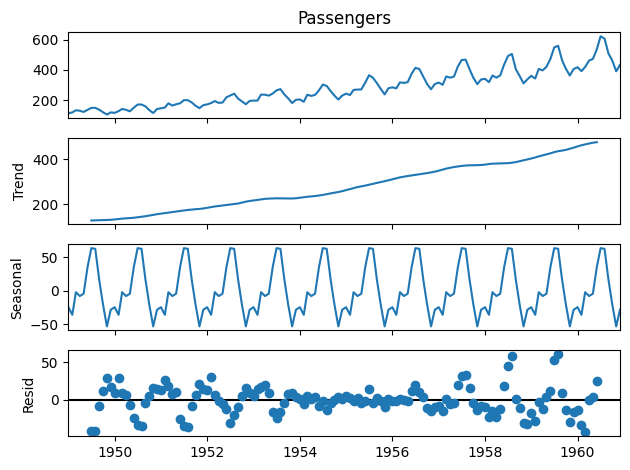

In [3]:
decomposed = seasonal_decompose(data['Passengers'], model='additive', period=12)
decomposed.plot()
plt.show()

In [4]:
model = ARIMA(data['Passengers'], order=(2, 1, 2))
result = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [5]:
forecast_steps = 10
forecast = result.forecast(steps=forecast_steps)
print("Forecasted values:")
print(forecast)

Forecasted values:
1961-01-01    439.854513
1961-02-01    465.296054
1961-03-01    500.665761
1961-04-01    535.971659
1961-05-01    561.690109
1961-06-01    571.314405
1961-07-01    562.974263
1961-08-01    539.731146
1961-09-01    508.529538
1961-10-01    478.147818
Freq: MS, Name: predicted_mean, dtype: float64


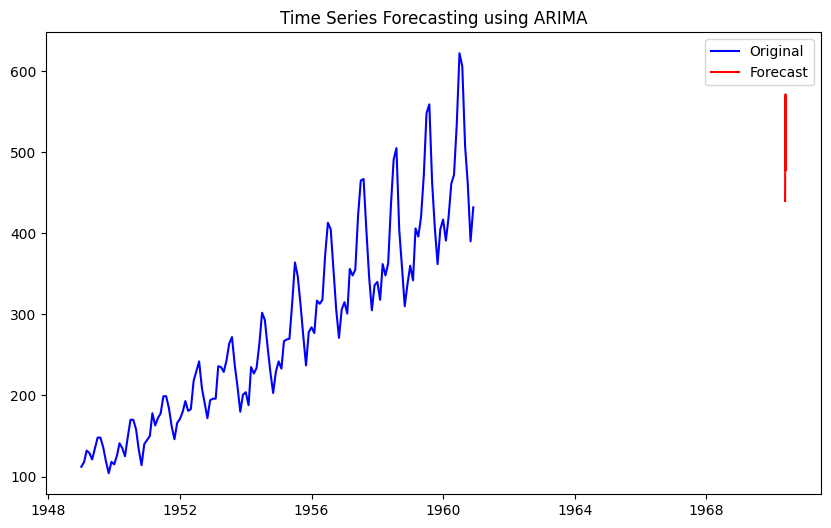

In [6]:
plt.figure(figsize=(10,6))
plt.plot(data['Passengers'], label='Original', color='blue')
plt.plot(range(len(data), len(data) + forecast_steps), forecast, label='Forecast', color='red')
plt.title('Time Series Forecasting using ARIMA')
plt.legend()
plt.show()